# 5.1- NLP

NLP trata de aplicaciones que entiendan nuestro idioma, reconocimiento de voz, traducción, comprensión semántica, análisis de sentimiento..

**Usos**

+ Motores de búsqueda
+ Feed de redes sociales
+ Asistentes de voz 
+ Filtros de span
+ Chatbots
+ IVR

**Librerías**

+ NLTK
+ Spacy
+ TFIDF
+ OpenNLP
+ HuggingFace
+ OpenAI
+ Twilio

La dificultad del NLP está en varios niveles:

+ Ambigüedad:

  * Nivel léxico: por ejemplo, varios significados
  * Nivel referencial: anáforas, metáforas, etc...
  * Nivel estructural: la semántica es necesaria para entender la estructura de una oración
  * Nivel pragmático: dobles sentidos, ironía, humor
  
+ Detección de espacios
+ Recepción imperfecta: acentos, -ismos, OCR

El proceso es similar que en USL, primero se vectorizan las palabras y después se miden sus distancias/similitudes. 

In [1]:
# lista de 100 peliculas

titles=open('../data/title_list.txt').read().split('\n')[:100]

titles[:10]

['The Godfather',
 'The Shawshank Redemption',
 "Schindler's List",
 'Raging Bull',
 'Casablanca',
 "One Flew Over the Cuckoo's Nest",
 'Gone with the Wind',
 'Citizen Kane',
 'The Wizard of Oz',
 'Titanic']

In [2]:
synopsis=open('../data/synopses_list.txt').read().split('\n BREAKS HERE')[:100]

synopsis[0][:100]

" Plot  [edit]  [  [  edit  edit  ]  ]  \n  On the day of his only daughter's wedding, Vito Corleone h"

In [3]:
len(synopsis)

100

### Limpieza

In [4]:
# importar spacy y nltk

#%pip install spacy
#%pip install nltk
#%pip install spacy-lookups-data

In [5]:
import nltk

# descarga de paquetes
#nltk.download()

In [6]:
import string

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

from nltk.corpus import stopwords


from nltk import word_tokenize

import re

import warnings
warnings.filterwarnings('ignore')

In [7]:
# ejecutar en terminal para descargar modelos

#!python -m spacy download en_core_web_sm  

In [8]:
nlp=spacy.load('en_core_web_sm')   # modelo preentrenado en ingles

# stopwords
stop_words_en=set(stopwords.words('english') + list(STOP_WORDS) + list(nlp.Defaults.stop_words) + ['edit', 'plot'])

stop_words=stop_words_en

In [9]:
synopsis[0][:400]

" Plot  [edit]  [  [  edit  edit  ]  ]  \n  On the day of his only daughter's wedding, Vito Corleone hears requests in his role as the Godfather, the Don of a New York crime family. Vito's youngest son, Michael, in a Marine Corps uniform, introduces his girlfriend, Kay Adams, to his family at the sprawling reception. Vito's godson Johnny Fontane, a popular singer, pleads for help in securing a covet"

In [10]:
def spacy_tokenizer(frase):

    tokens=word_tokenize(frase)    # lista de palabras

    filtrado=[]

    for palabra in tokens:

        lemma=nlp(str(palabra))[0].lemma_.lower().strip()
        
        if lemma not in stop_words and re.search('^[a-zA-Z]+$', lemma):
            filtrado.append(lemma)
            
    return filtrado

In [11]:
spacy_tokenizer(synopsis[0][:400])

['day',
 'daughter',
 'wedding',
 'vito',
 'corleone',
 'hear',
 'request',
 'role',
 'godfather',
 'new',
 'york',
 'crime',
 'family',
 'vito',
 'young',
 'son',
 'michael',
 'marine',
 'corps',
 'uniform',
 'introduce',
 'girlfriend',
 'kay',
 'adam',
 'family',
 'sprawl',
 'reception',
 'vito',
 'godson',
 'johnny',
 'fontane',
 'popular',
 'singer',
 'plead',
 'help',
 'secure',
 'covet']

### TFIDF (term frequency inverse document frequency)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
tfidf=TfidfVectorizer(min_df=0.15, tokenizer=spacy_tokenizer)

In [14]:
%%time 

tfidf_matrix=tfidf.fit_transform(synopsis)

CPU times: user 6min 41s, sys: 1.57 s, total: 6min 43s
Wall time: 6min 44s


In [15]:
tfidf_matrix.shape, len(synopsis)

((100, 279), 100)

In [16]:
(str(tfidf_matrix[0]).split('\n'))[:10]

['  (0, 264)\t0.05195778473541241',
 '  (0, 124)\t0.0683021208034531',
 '  (0, 54)\t0.06455276766523606',
 '  (0, 53)\t0.0657425073188974',
 '  (0, 195)\t0.14229338623802046',
 '  (0, 245)\t0.033529967786142756',
 '  (0, 2)\t0.06699030554572089',
 '  (0, 233)\t0.0657425073188974',
 '  (0, 221)\t0.10251412342157659',
 '  (0, 263)\t0.07114669311901023']

In [17]:
import pandas as pd

df=pd.DataFrame(tfidf_matrix)

In [18]:
df.head()

,0
0,"(0, 264)\t0.05195778473541241\n (0, 124)\t0..."
1,"(0, 3)\t0.07398606760004768\n (0, 14)\t0.07..."
2,"(0, 95)\t0.07268504463149769\n (0, 187)\t0...."
3,"(0, 156)\t0.07117919158660735\n (0, 134)\t0..."
4,"(0, 246)\t0.07007639574163582\n (0, 102)\t0..."


In [19]:
terms=tfidf.get_feature_names_out()

terms[:15]

array(['able', 'accept', 'act', 'admit', 'affair', 'agree', 'allow',
       'american', 'apartment', 'appear', 'approach', 'arm', 'army',
       'arrange', 'arrest'], dtype=object)

In [20]:
len(terms)

279

In [21]:
tfidf_df=pd.DataFrame(tfidf_matrix.toarray(), columns=terms)

tfidf_df.head()

,able,accept,act,admit,affair,agree,allow,american,apartment,appear,...,win,window,witness,woman,work,world,wound,year,york,young
0,0.0,0.186982,0.06699,0.000000,0.000000,0.046826,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.093651,0.131485,0.046826
1,0.0,0.000000,0.00000,0.073986,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.098988,0.058507,0.0,0.095312,0.000000,0.000000
2,0.0,0.000000,0.00000,0.000000,0.000000,0.050806,0.122868,0.000000,0.0,0.0,...,0.074108,0.0,0.067626,0.055614,0.000000,0.155936,0.0,0.000000,0.000000,0.000000
3,0.0,0.000000,0.00000,0.000000,0.140051,0.000000,0.000000,0.094990,0.0,0.0,...,0.131584,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.045105,0.189979,0.000000
4,0.0,0.000000,0.00000,0.000000,0.000000,0.054435,0.065822,0.076426,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.056535,0.000000,0.0,0.000000,0.000000,0.000000


In [22]:
tfidf_df.shape

(100, 279)

### Distancias

In [23]:
from sklearn.metrics.pairwise import cosine_similarity as cos

In [24]:
distancias=1-cos(tfidf_matrix)

distancias.shape

(100, 100)

In [25]:
pd.DataFrame(distancias).head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-2.220446e-16,7.823252e-01,8.613287e-01,0.728574,7.920806e-01,0.890847,0.686216,0.807017,0.787658,0.892113,...,0.711455,0.854941,0.793626,0.839070,0.738379,0.704077,0.840584,0.760392,0.819074,0.836106
1,7.823252e-01,-2.220446e-16,7.356491e-01,0.856228,7.398684e-01,0.773820,0.757898,0.741708,0.755691,0.880094,...,0.736923,0.823799,0.815867,0.861396,0.784921,0.896793,0.873847,0.725600,0.809578,0.881673
2,8.613287e-01,7.356491e-01,-2.220446e-16,0.798006,7.681819e-01,0.794821,0.709619,0.744165,0.801774,0.822027,...,0.837733,0.837956,0.697371,0.797606,0.823124,0.905449,0.857548,0.785374,0.802764,0.856607
3,7.285736e-01,8.562281e-01,7.980060e-01,0.000000,7.984989e-01,0.799007,0.751026,0.667497,0.838479,0.820019,...,0.823748,0.838125,0.759854,0.747629,0.710820,0.818018,0.800954,0.788693,0.807612,0.834004
4,7.920806e-01,7.398684e-01,7.681819e-01,0.798499,-2.220446e-16,0.710904,0.698729,0.798067,0.705634,0.773711,...,0.676539,0.764317,0.737144,0.731261,0.606953,0.706905,0.751714,0.623090,0.637548,0.748952


### Clustering

In [26]:
import warnings
warnings.simplefilter('ignore')

import pylab as plt
from IPython.display import set_matplotlib_formats

%matplotlib inline
set_matplotlib_formats('svg')

import numpy as np

In [27]:
from umap import UMAP

In [28]:
umap=UMAP(n_neighbors=5, random_state=42)

emb=umap.fit_transform(distancias)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [29]:
emb[:5]

array([[7.196637 , 8.258526 ],
       [5.9683285, 7.3150764],
       [3.7053924, 5.2830305],
       [9.750681 , 9.554252 ],
       [4.9196177, 8.024595 ]], dtype=float32)

In [30]:
emb.shape

(100, 2)

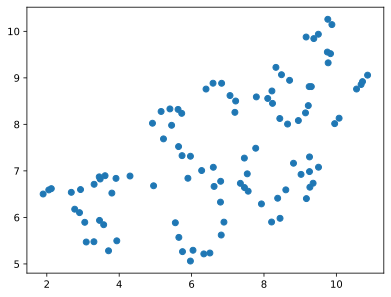

In [31]:
plt.scatter(emb[:, 0], emb[:, 1]);

In [32]:
# DBSCAN

from sklearn.cluster import DBSCAN

In [33]:
dbscan=DBSCAN(eps=0.6, min_samples=6)

In [34]:
dbscan.fit(emb)

DBSCAN(eps=0.6, min_samples=6)

In [35]:
clusters=dbscan.labels_

In [36]:
from hdbscan import HDBSCAN

In [37]:
hdbscan=HDBSCAN(min_cluster_size=3)

#clusters=hdbscan.fit_predict(emb)

In [38]:
np.unique(clusters)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8])

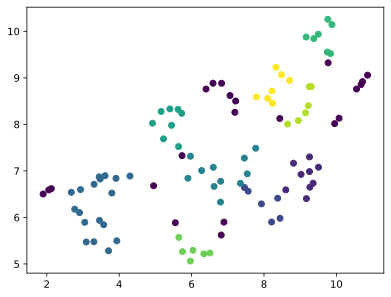

In [39]:
plt.scatter(emb[:,0], emb[:,1], c=clusters);

### titulos de los clusters

In [40]:
def get_titles_from_cluster(c):
    return pd.Series(titles)[clusters==c]

In [41]:
get_titles_from_cluster(0)

6              Gone with the Wind
16                   Forrest Gump
20     E.T. the Extra-Terrestrial
44    The Best Years of Our Lives
45                   My Fair Lady
46                        Ben-Hur
47                 Doctor Zhivago
77                          Giant
78            The Grapes of Wrath
dtype: object

In [42]:
def get_df_from_cluster(c):
    return tfidf_df[clusters==c]

In [43]:
get_df_from_cluster(2).describe()

,able,accept,act,admit,affair,agree,allow,american,apartment,appear,...,win,window,witness,woman,work,world,wound,year,york,young
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,0.010252,0.006843,0.015687,0.003129,0.008907,0.016130,0.028761,0.059414,0.008571,0.011678,...,0.027392,0.004464,0.015489,0.016897,0.021310,0.036281,0.072437,0.014960,0.004732,0.017247
std,0.024265,0.020093,0.051059,0.013277,0.026598,0.031002,0.040154,0.097266,0.036364,0.040115,...,0.054921,0.018939,0.026792,0.027572,0.048222,0.053810,0.084624,0.026042,0.020078,0.035601
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044133,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.024212,0.062893,0.077473,0.000000,0.000000,...,0.044249,0.000000,0.023210,0.032866,0.000000,0.066493,0.143506,0.028661,0.000000,0.027211
max,0.080352,0.069338,0.207833,0.056328,0.097524,0.114117,0.122868,0.327103,0.154279,0.167226,...,0.211690,0.080352,0.070392,0.092218,0.174791,0.155936,0.216903,0.080895,0.085182,0.139498


In [44]:
get_df_from_cluster(0).iloc[0].sum()

8.896282701188431

In [45]:
top_words=get_df_from_cluster(-1).T.sum(axis=1).sort_values(ascending=False)

top_words.head()

george       3.015806
john         2.359848
apartment    2.336473
family       2.016855
captain      1.811218
dtype: float64

## NLP_es 

In [46]:
#!python -m spacy download es_core_news_md

In [47]:
nlp=spacy.load('es_core_news_md')

In [48]:
nlp('hola me llamo pepito').vector.sum()

-17.019897

In [49]:
(nlp('hola').vector + nlp('me').vector + nlp('llamo').vector + nlp('pepito').vector).sum()/4

-17.0198974609375

##### similitud

In [50]:
nlp('quiero saludar a todos los alumnos de Ironhack, que pasa alegres').similarity(nlp('hola a todos los alumnos'))

0.8309713443074137

In [51]:
token_1=spacy_tokenizer('quiero saludar a todos los alumnos de Ironhack, que pasa alegres')
token_2=spacy_tokenizer('hola a todos los alumnos')

token_1

['querer',
 'saludar',
 'todo',
 'el',
 'alumno',
 'de',
 'ironhack',
 'que',
 'pasar',
 'alegre']

In [52]:
def get_simil(t1, t2):
    return nlp(' '.join(t1)).similarity(nlp(' '.join(t2)))  # similitud es entre -1 y 1, por el valor del coseno

In [53]:
get_simil(token_1, token_2)

0.7221080959132022

# WordClouds

In [54]:
#%pip install langdetect
#%pip install wordcloud

In [55]:
from PIL import Image

stop_words_sp=set(stopwords.words('spanish') + ['haber', 'plot', 'edit'])
stop_words_en=set(stopwords.words('english'))

stop_words= stop_words_sp | stop_words_en

from langdetect import detect

from wordcloud import WordCloud

In [56]:
def tokenizer(frase):
    
    if detect(frase)=='en':  # si esta en ingles...
        nlp=spacy.load('en_core_web_sm')
        
    elif detect(frase)=='es': # si esta en castellano...
        nlp=spacy.load('es_core_news_md')
        
    else:
        return 'No es ni castellano ni ingles..'
    
    
    tokens=word_tokenize(frase)
    
    clean_tokens=[]
    
    for e in tokens:
        
        lema=nlp(str(e))[0].lemma_.lower().strip()
        
        if lema not in stop_words and re.search('^[a-zA-Z]+$', lema):
            
            clean_tokens.append(lema)
            
    return ' '.join(clean_tokens)

In [57]:
def wordcloud(df, col):
    
    w=WordCloud(width=1600, height=400,
                stopwords=stop_words, 
                colormap='Spectral').generate(' '.join([e for e in df[col]]))
    
    plt.figure(figsize=(15, 10), facecolor='k')
    plt.imshow(w)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.savefig('images/wordcloud.png', facecolor='k', bbox_inches='tight')
    plt.show();

In [58]:
%%time

df=pd.DataFrame(synopsis, columns=['text'])

df.text=df.text.apply(tokenizer)

df.head()

CPU times: user 7min 13s, sys: 2.01 s, total: 7min 15s
Wall time: 7min 16s


,text
0,day daughter wedding vito corleone hear reques...
1,banker andy dufresne convict murder wife lover...
2,german move polish jews ghetto world war ii be...
3,brief scene age overweight italian american ja...
4,early december american expatriate rick blaine...


In [59]:
%%time

txt=open('../data/conde.txt').read().split('\n BREAKS HERE')[:100]

df2=pd.DataFrame(txt, columns=['text'])

df2.text=df2.text.apply(tokenizer)

df2.head()

CPU times: user 25 s, sys: 89.3 ms, total: 25.1 s
Wall time: 25.1 s


,text
0,timesnewromanpsmt alejandro conde marsella feb...


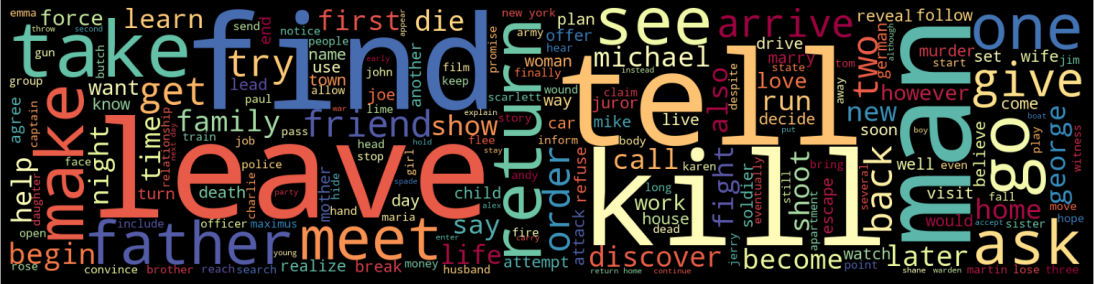

In [60]:
wordcloud(df, 'text')

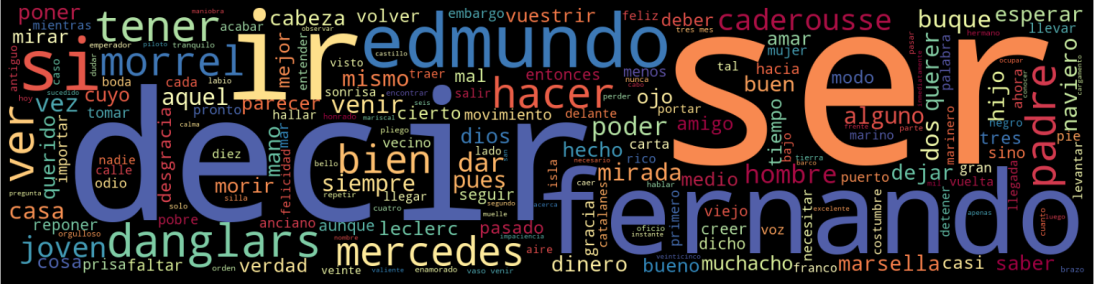

In [61]:
wordcloud(df2, 'text')

#### Mascara

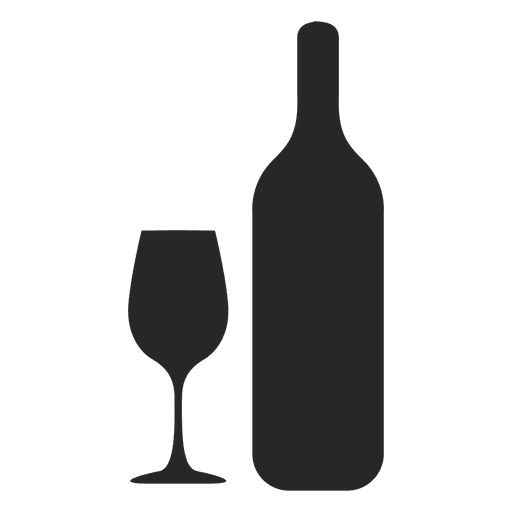

In [62]:
# imagen con mascara

Image.open('images/vino.png')

In [63]:
vino_mask=np.array(Image.open('images/vino.png'))

vino_mask.shape

(512, 512)

In [64]:
# transformacion de la mascara

def transformacion(val):
    if val==0:
        return 255
    else:
        return val

In [65]:
t_vino_mask=np.ndarray((vino_mask.shape[0], vino_mask.shape[1]), np.int32)


for i in range(len(vino_mask)):
    t_vino_mask[i]=list(map(transformacion, vino_mask[i]))

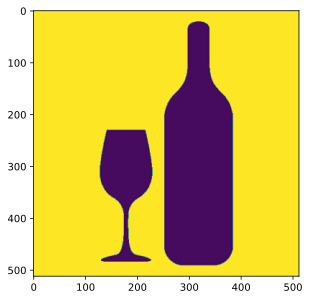

In [66]:
plt.imshow(t_vino_mask);

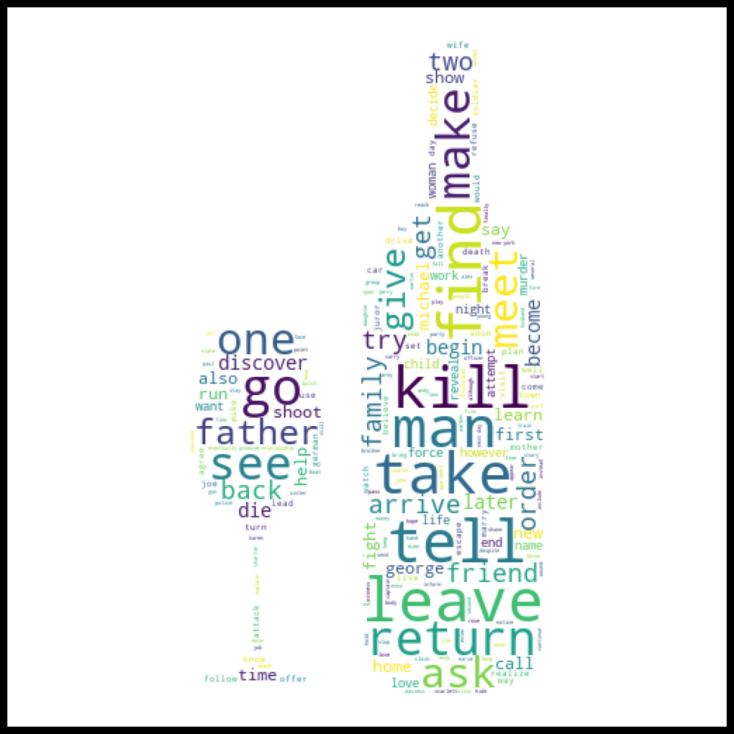

In [67]:
w=WordCloud(background_color='white',
                   max_words=1000,
                   mask=t_vino_mask,
                   stopwords=stop_words,
                   contour_width=0,
                   contour_color='firebrick').generate(' '.join([e for e in df.text]))


w.to_file('images/copa&botella.png')


plt.figure(figsize=(15, 10), facecolor='k')
plt.imshow(w)
plt.axis('off')
plt.tight_layout(pad=0)


## NER

In [68]:
news=pd.read_csv('../data/noticias.csv')

news.head()

,url,authors,title,publish_date,text,top_image,keywords,summary,video,polarity,subjectivity,negativity,neutrality,positivity,compound_score
0,http://epaper.lavanguardia.com/la-vanguardia/l...,[],14 de agosto de 2020,2020-08-14 00:00:00,"Segunda\n\nTodo sobre Kamala Harris En 1970, c...",http://static.milibris.com/thumbnail/issue/9d8...,"[""14"", ""2020"", ""agosto""]",Postal: ciudad zombi La preocupación por la ag...,[],0.031507,0.381115,0.020,0.960,0.021,-0.1048
1,http://epaper.lavanguardia.com/la-vanguardia/l...,[],13 de septiembre de 2020,2020-09-13 00:00:00,Segunda\n\nEl papel no quiere morir Una notici...,http://static.milibris.com/thumbnail/issue/876...,"[""septiembre"", ""2020"", ""13""]",El honor de la familia se ha desplazado del vi...,[],0.090058,0.451170,0.025,0.955,0.020,-0.9705
2,http://epaper.lavanguardia.com/la-vanguardia/l...,[],15 de julio de 2020,2020-07-15 00:00:00,Segunda\n\nPrivacidad en peligro Existe una em...,http://static.milibris.com/thumbnail/issue/cce...,"[""julio"", ""2020"", ""15""]",Los estudiantes internacionales matriculados e...,[],0.076812,0.416667,0.025,0.957,0.018,-0.9798
3,https://club.lavanguardia.com/es/ocio-cultura/...,[],Descuento PortAventura,NaN,Presenta tu tarjeta del Club en taquillas\n\n3...,https://club.lavanguardia.com/sites/default/fi...,"[""world"", ""descuento"", ""portaventura"", ""tarjeta""]",Presenta tu tarjeta del Club en taquillas35% d...,"[""https://www.youtube.com/embed/oqXl8CLaHdY""]",0.100000,0.100000,0.040,0.960,0.000,-0.7783
4,http://epaper.lavanguardia.com/la-vanguardia/l...,[],1 de febrero de 2021,2021-02-01 00:00:00,Portada\n\nSalut defiende prolongar las restri...,http://static.milibris.com/thumbnail/issue/d7c...,"[""febrero"", ""2021""]",Sostiene que el PP genera progreso allí donde ...,[],0.057292,0.425556,0.021,0.957,0.022,-0.5686


In [69]:
import spacy
from spacy import displacy

In [70]:
#!python -m spacy download es_core_news_lg

In [71]:
#!python -m spacy download en_core_web_lg

In [72]:
spacy_core_es='es_core_news_md'

spacy_core_en='en_core_web_sm'

In [73]:
def ner(spacy_core, data):
    
    nlp=spacy.load(spacy_core)
    
    frases=list(nlp(data).sents)  # frases, sentencias
    
    entidades=displacy.render(nlp(str(frases)), style='ent')
    
    return entidades

In [74]:
ner(spacy_core_es, news.text[150])

In [75]:
ner(spacy_core_en, synopsis[3][:1000])

### Transformers (creacion de texto)

https://huggingface.co/

https://huggingface.co/docs/transformers/main_classes/pipelines

https://huggingface.co/models?pipeline_tag=text-generation&sort=downloads

In [76]:
#%pip install transformers
#%pip install torch

In [77]:
from transformers import pipeline

generator = pipeline('text-generation', model='gpt2')

generator('crea una funcion de python para cargar un csv', do_sample=False)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'crea una funcion de python para cargar un csv.\n\nThe following code snippet shows how to use the python interpreter to create a python script that will run the python script.\n\nimport os import sys import time import'}]

In [78]:
generator = pipeline('text-classification')

generator('hola carahuevo, malos dias')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'NEGATIVE', 'score': 0.6213536858558655}]

## OpenAI

https://openai.com/blog/openai-api/

https://platform.openai.com/docs/introduction

In [79]:
#%pip install openai

In [80]:
import openai as ai

In [81]:
ai.api_key = 'sk-CU7imJ5bTC4f9bnGNS3IT3Blb...............'

In [ ]:
# GPT3

question = 'Escribe una funcion de python para leer un csv con pandas'

prompt = f'Human: {question}\nAI:'

response = ai.Completion().create(prompt=prompt,
                                  engine='text-davinci-003',
                                  stop=['\nHuman'],
                                  echo=False,
                                  temperature=0.3,
                                  top_p=1,
                                  frequency_penalty=0,
                                  presence_penalty=0.2,
                                  max_tokens=2000)

In [ ]:
response

In [ ]:
response.choices[0]['text'].split('\n')

In [ ]:
def update_chat_log(question, answer, chat_log=''):

    return f'{chat_log}Human: {question}\nAI: {answer}\n'

In [ ]:
chat_log = ''

question = 'Escribe una funcion de python para leer un csv con pandas'

prompt = f'{chat_log}Human: {question}\nAI:'

response = ai.Completion().create(prompt=prompt,
                                      engine="text-davinci-003",
                                      stop=['\nHuman'],
                                      echo=False,
                                      temperature=0.2,
                                      top_p=1,
                                      frequency_penalty=0,
                                      presence_penalty=0.6,
                                      max_tokens=1000)

answer = response.choices[0]['text']

chat_log = update_chat_log(question, answer, chat_log)

In [ ]:
chat_log

In [ ]:
# chatGPT

response = ai.ChatCompletion.create(model='gpt-3.5-turbo',
                                    messages=[{'role': 'user', 'content': prompt}]
                                   )

In [ ]:
response.choices[0]['message']['content'].split('\n')

In [ ]:
# crear embeddings

texto = 'Escribe una funcion de python para leer un csv con pandas'

response = ai.Embedding.create(input=texto, model='text-embedding-ada-002')

embeddings = response['data'][0]['embedding']

embeddings[:10]

In [ ]:
len(embeddings)